# Análisis de sentimientos 
Lectura y exploración de datos


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install stop_words
!pip install scikit-multilearn
!pip install sentence-transformers==0.3.6

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp37-none-any.whl size=32913 sha256=d819f0587bf8362353aabe790c64c54606b0aec0f05a05376d5378b4c47ab810
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words
     |████████████████████████████████| 92kB 7.0MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 890kB 22.4MB/s 
     |████████████████████████████████| 3.0MB 30.7MB/s 
     |████████████████████████████████| 1.2MB 54.5MB/s 
     |████████████████████████████████| 901kB 51.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.6-cp37-none-any.whl size=101181 sha256=33a46268ce5326bc061ea59b661bd486d7f21226aa374759d9c74f988b41b7d6
  Stored in directory: /root/.cache/pip/wheels/6f/3f/75/c0c4b3ef5dfbf8806d37b8dc661861772aba2f7aa419c85a9b
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from collections import  Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

from skmultilearn.model_selection import iterative_train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from transformers import BertForSequenceClassification
import pickle
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Carga de datos

In [ ]:
#path = '/content/drive/MyDrive/MineriaTextos/proyecto_mineria_textos_turismo/'
path= "/content/drive/MyDrive/proyecto_mineria_textos_turismo/"
sent_path_test = 'Sentiment_Test/'
sent_path_train = 'rest-mex_2021_Sentiment_data_train/'

In [ ]:
data_train = pd.read_csv(path + sent_path_train + 'rest-mex_2021_Sentiment_data_train.csv')
data_train.drop('index', axis=1, inplace=True)
data_train.drop_duplicates(inplace=True)
data_train.dropna(inplace=True)
data_train.reset_index(inplace=True, drop=True)
print(data_train.shape)
data_train.head()

(5179, 8)


,Title,Opinion,Place,Gender,Age,Country,Date,Label
0,"""¡Momias, demasiado impresionante!""","""Las momias están en muy buen estado de conser...",Museo de las Momias,Male,53,México,22/10/2016,1
1,Comida cara,Tienen carteles con comida cortida de 40 y no ...,Mercado Hidalgo,N/I,-1,México,2018,1
2,"""No coman ahí""","""Creo que es muy insalubre, hay basura por tod...",Mercado Hidalgo,Female,61,México,15/01/2013,1
3,"""Momificado""","""Para mí gusto no vale la pena... tristemente ...",Museo de las Momias,Male,38,Colombia,11/05/2017,1
4,"""Incómodo y cero romántico""","""Es un lugar poco interesante y que se conoce ...",Callejón del Beso,Female,38,Francia,28/11/2017,1


In [ ]:
data_train['Title'] = data_train['Title'].str.lower()
data_train['Opinion'] = data_train['Opinion'].str.lower()
data_train['Place'] = data_train['Place'].str.lower()

In [ ]:
data_train['Date'] = pd.to_datetime(data_train['Date'], infer_datetime_format=True) 
data_train['Date'].head()

0   2016-10-22
1   2018-01-01
2   2013-01-15
3   2017-11-05
4   2017-11-28
Name: Date, dtype: datetime64[ns]

# Limpieza
En esta sección se realiza una limpieza básica con el fin de realizar un análisis exploratotio a los datos, como eliminar comillas al inicio y final de la oración, etc.

In [ ]:
for c in ['Title', 'Opinion']:
  aux = data_train[c].astype(str).apply(lambda x: x.strip('"'))
  data_train.drop(c, axis=1, inplace=True)
  data_train[c] = aux

In [ ]:
data_train.head()

,Place,Gender,Age,Country,Date,Label,Title,Opinion
0,museo de las momias,Male,53,México,2016-10-22,1,"¡momias, demasiado impresionante!",las momias están en muy buen estado de conserv...
1,mercado hidalgo,N/I,-1,México,2018-01-01,1,comida cara,tienen carteles con comida cortida de 40 y no ...
2,mercado hidalgo,Female,61,México,2013-01-15,1,no coman ahí,"creo que es muy insalubre, hay basura por todo..."
3,museo de las momias,Male,38,Colombia,2017-11-05,1,momificado,para mí gusto no vale la pena... tristemente e...
4,callejón del beso,Female,38,Francia,2017-11-28,1,incómodo y cero romántico,es un lugar poco interesante y que se conoce e...


# Exploración

## Gráficas

In [ ]:
data_train.columns

Index(['Place', 'Gender', 'Age', 'Country', 'Date', 'Label', 'Title',
       'Opinion'],
      dtype='object')

In [ ]:
from collections import Counter
Counter(data_train['Gender'])

Counter({'Female': 2439, 'Male': 2672, 'N/I': 68})

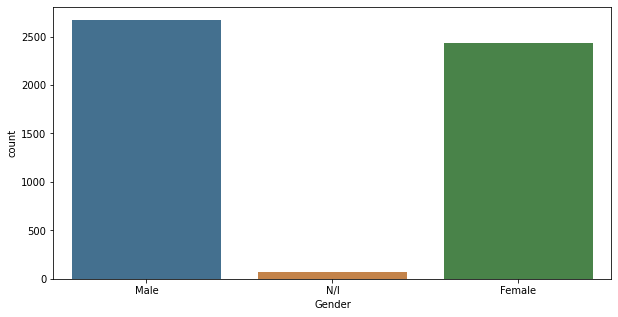

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = data_train, x = 'Gender', saturation=0.5)

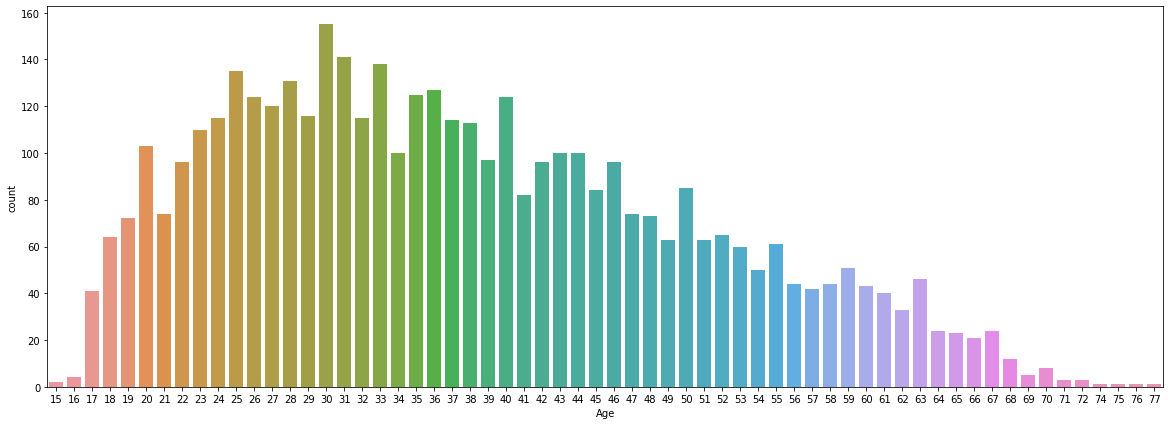

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data = data_train[data_train["Age"]!=-1], x = 'Age')

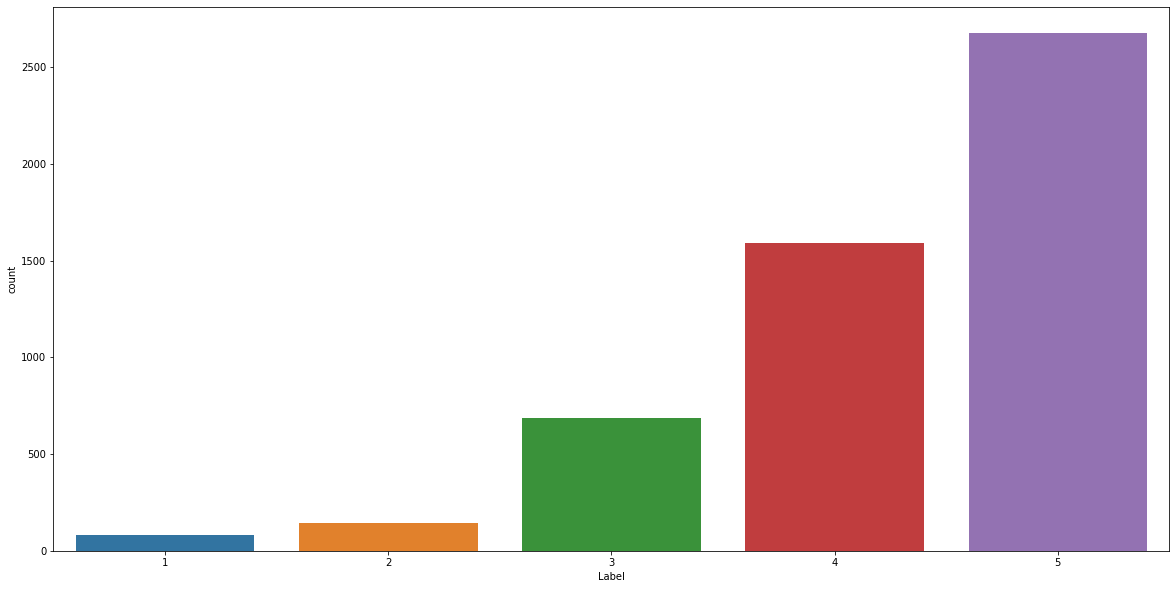

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data = data_train, x = 'Label')

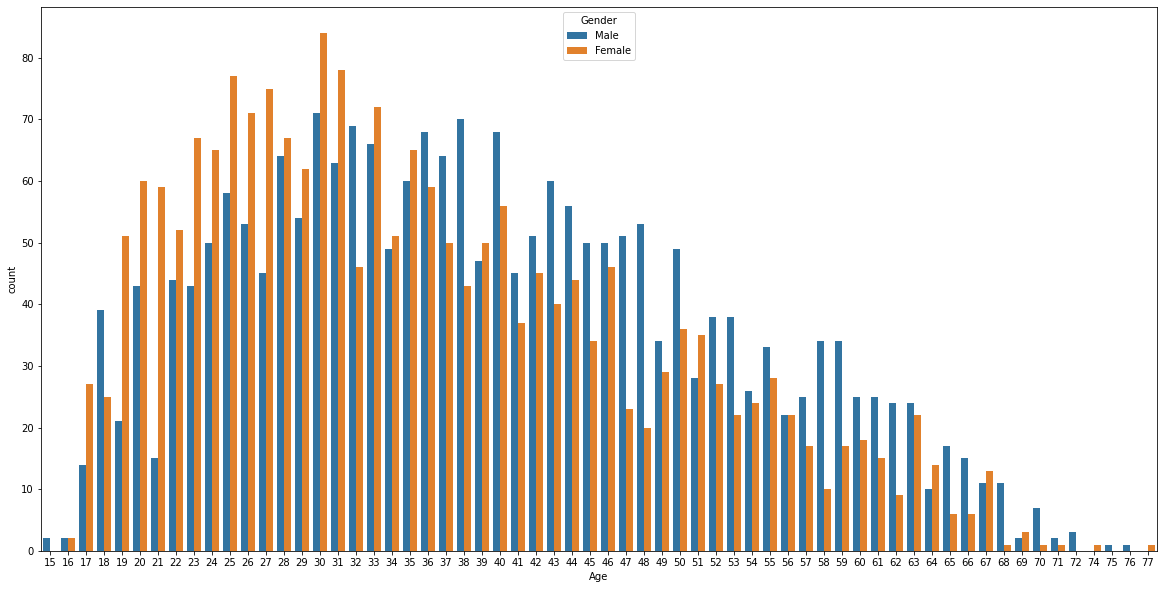

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data = data_train[data_train["Age"]!=-1], x = 'Age', hue = 'Gender')

<Figure size 1440x720 with 0 Axes>

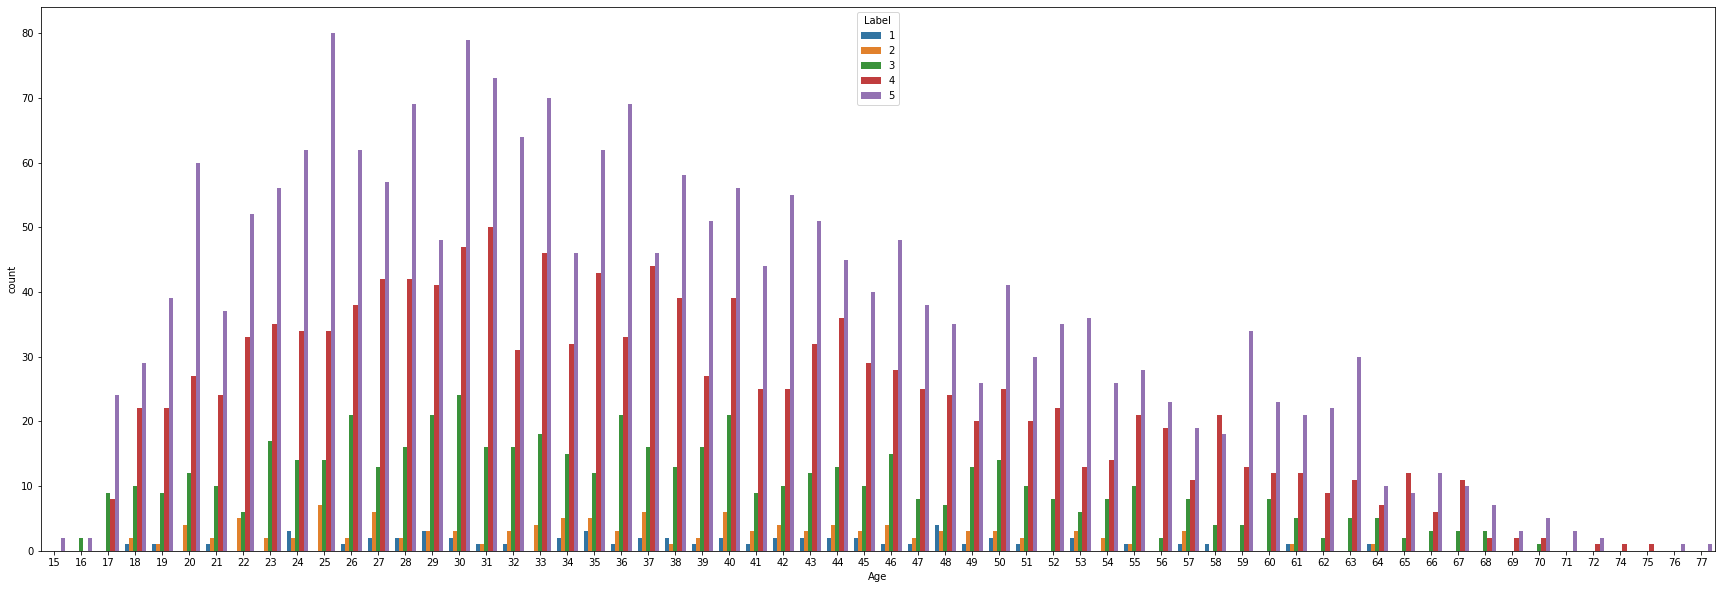

In [ ]:
plt.figure(figsize=(20,10))
plt.figure(figsize=(30,10))
sns.countplot(data = data_train[data_train["Age"]!=-1], x = 'Age', hue = 'Label')

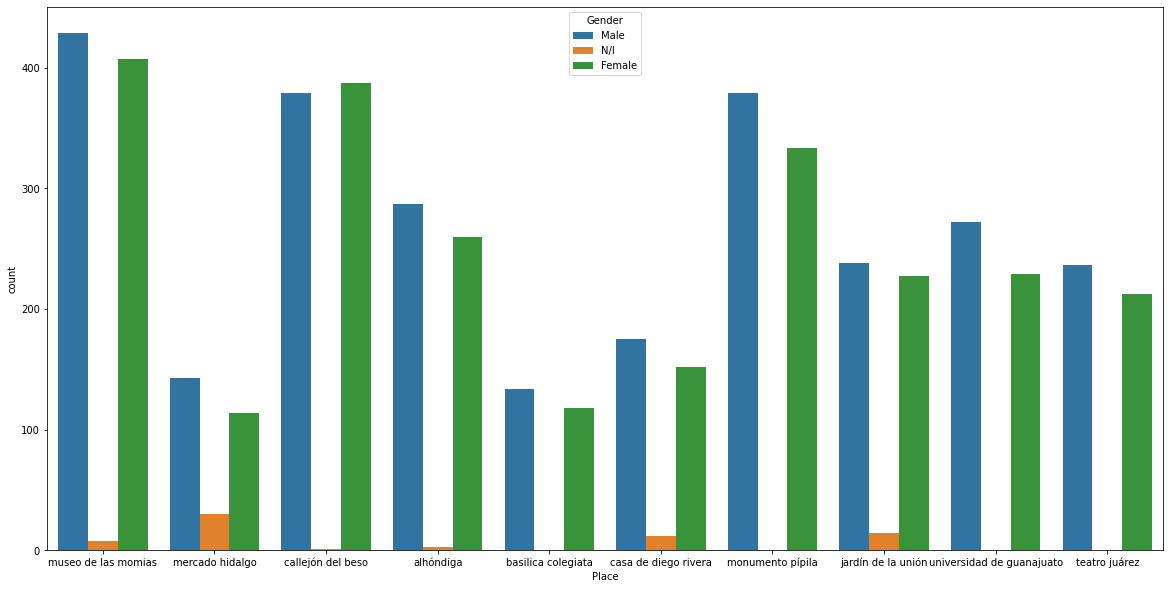

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data = data_train, x = 'Place', hue = 'Gender')

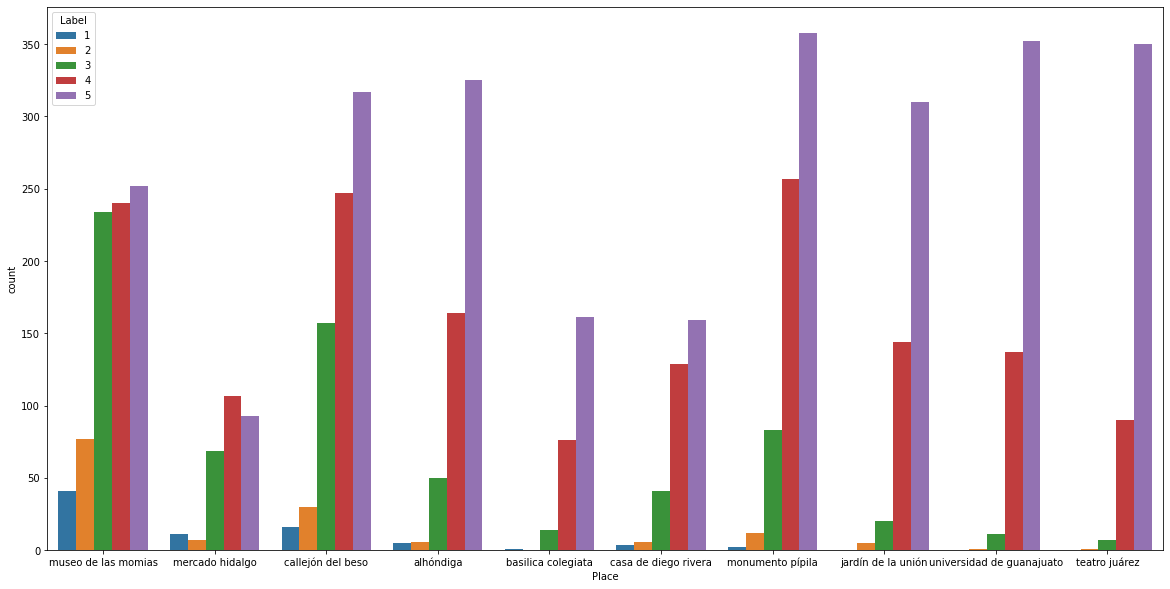

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data = data_train, x = 'Place', hue = 'Label')

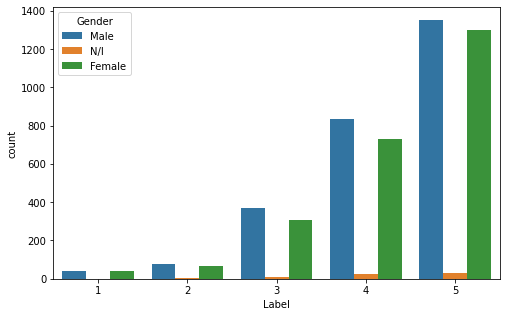

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = data_train, x = 'Label', hue = 'Gender')

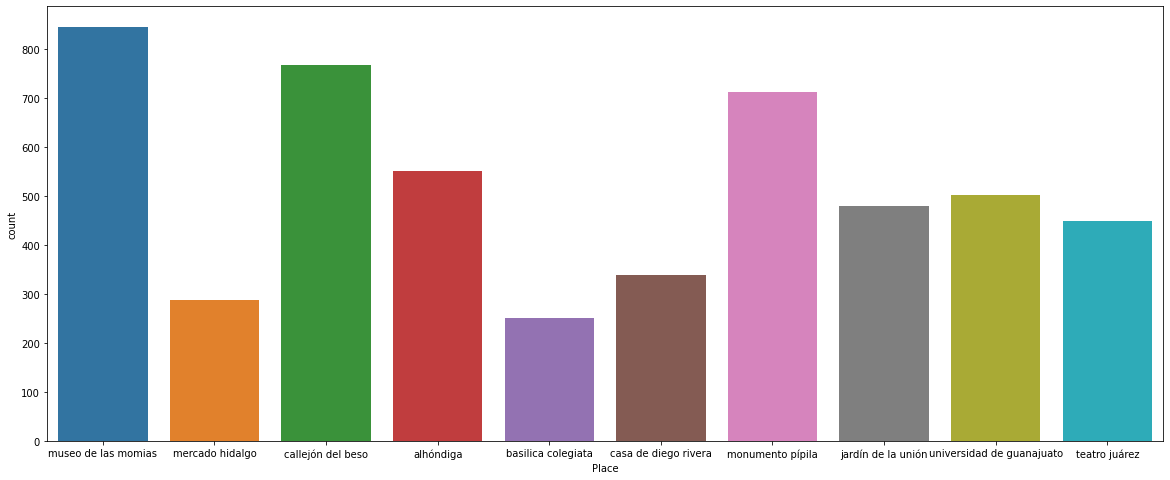

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data = data_train, x = 'Place')

## Léxica

In [ ]:
def clean_text(text):
    text=re.sub("\d+", "0", text)
    return re.sub(r" +", " ", re.sub(r"\t", " ", re.sub(r"\n+", "\n", text)))

In [ ]:
def len_com(df, title, label):
  lengths = df[df.Label == label]['Opinion'].str.len()
  plt.hist(lengths)
  plt.title(title)
  plt.show()

In [ ]:
data_train.columns

Index(['Place', 'Gender', 'Age', 'Country', 'Date', 'Label', 'Title',
       'Opinion'],
      dtype='object')

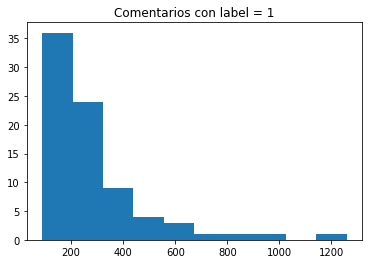

In [ ]:
label = 1
len_com(data_train, f'Comentarios con label = {label}', label = label)

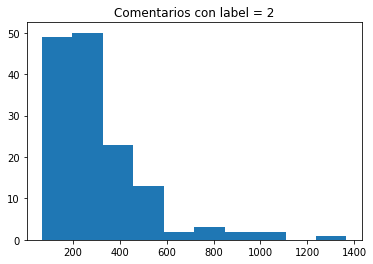

In [ ]:
label = 2
len_com(data_train, f'Comentarios con label = {label}', label = label)

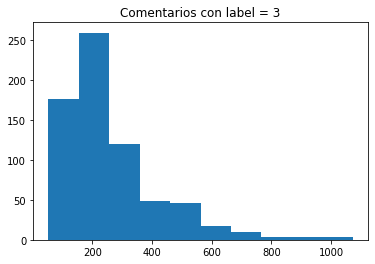

In [ ]:
label = 3
len_com(data_train, f'Comentarios con label = {label}', label = label)

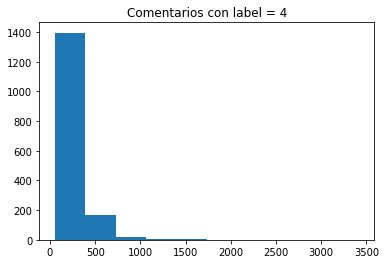

In [ ]:
label = 4
len_com(data_train, f'Comentarios con label = {label}', label = label)

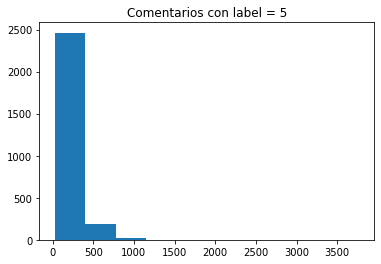

In [ ]:
label = 5
len_com(data_train, f'Comentarios con label = {label}', label = label)

## Nuve de palabras

In [ ]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 45, width=500, height=400,
                   stopwords = ['lugar','ciudad','cada','hace','entrar', 'entrada','lugare','pues','sitio','embargo',
                                'cosa','creo','parte','mismo','solo','soló','después','escalera'])
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    #plt.figure()
    #plt.imshow(image_mask, cmap=plt.cm.gray, interpolation='bilinear')
    #plt.axis("off")
    plt.show()

In [ ]:
def word_cloud(label, title):
  top_N = 100
  if label == -1:# en caso de que se quiera la nuve general y no por etiqueta
    text = data_train['Opinion'].str.lower().str.cat(sep = ' ')
  else:
    text = data_train['Opinion'][data_train.Label == label].str.lower().str.cat(sep = ' ')

  exp = re.sub('^\w+', '', text)
  stop_words = list(get_stop_words('es'))         
  nltk_words = list(stopwords.words('spanish'))   
  stop_words.extend(nltk_words)

  word_tokens = word_tokenize(exp)
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)

  # removemos palabras con long menor a 3
  without_single_chr = [word for word in filtered_sentence if len(word) > 3]
  cleaned_opinions = [word for word in without_single_chr if not word.isnumeric()]   
  wc(cleaned_opinions,'white',title)     

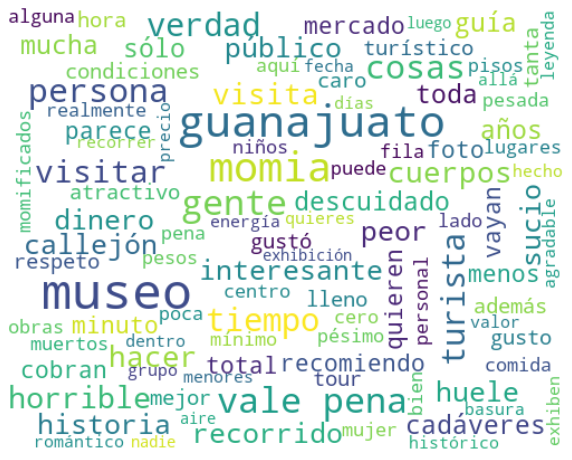

In [ ]:
label = 1
word_cloud(label, f'Palabras comúmes en comentarios con label = {label}')

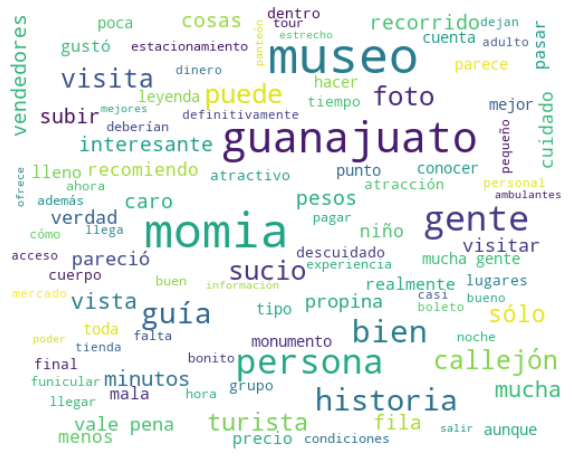

In [ ]:
label = 2
word_cloud(label, f'Palabras comúmes en comentarios con label = {label}')

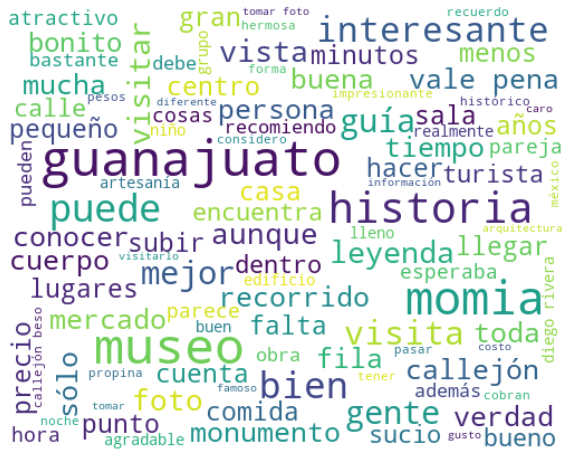

In [ ]:
label = 3
word_cloud(label, f'Palabras comúmes en comentarios con label = {label}')

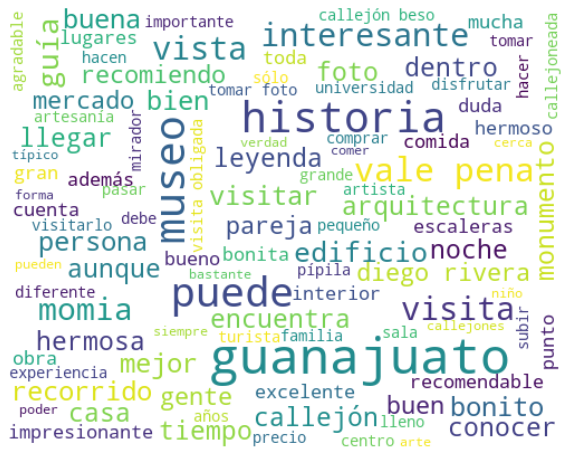

In [ ]:
label = 4
word_cloud(label, f'Palabras comúmes en comentarios con label = {label}')

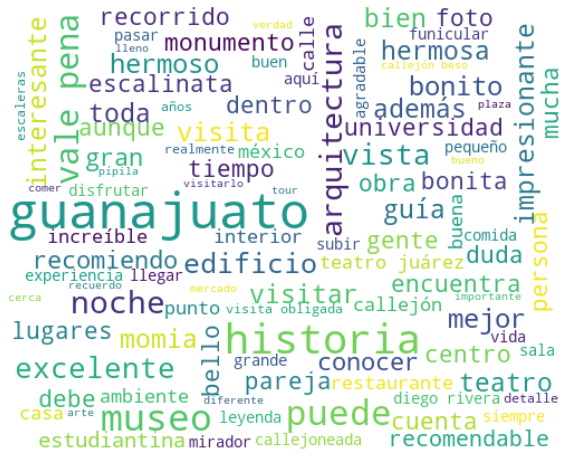

In [ ]:
label = 5
word_cloud(label, f'Palabras comúmes en comentarios con label = {label}')

In [ ]:
# label = -1
# word_cloud(label, f'Palabras comúmes', path_image)

# Train - Test split

In [ ]:
labels = {'1':'1','2':'2','3':'3','4':'4','5':'5'}
def targets(user):
    user.loc[labels[str(user.Label)]] = 1
    return user

In [ ]:
#Generamos las columnas de cada clase
for k in labels.keys():
    data_train[labels[k]] = 0

In [ ]:
data_train = data_train.apply(targets, axis=1)

In [ ]:
data_train.head()

,Place,Gender,Age,Country,Date,Label,Title,Opinion,1,2,3,4,5
0,museo de las momias,Male,53,México,2016-10-22,1,"¡momias, demasiado impresionante!",las momias están en muy buen estado de conserv...,1,0,0,0,0
1,mercado hidalgo,N/I,-1,México,2018-01-01,1,comida cara,tienen carteles con comida cortida de 40 y no ...,1,0,0,0,0
2,mercado hidalgo,Female,61,México,2013-01-15,1,no coman ahí,"creo que es muy insalubre, hay basura por todo...",1,0,0,0,0
3,museo de las momias,Male,38,Colombia,2017-11-05,1,momificado,para mí gusto no vale la pena... tristemente e...,1,0,0,0,0
4,callejón del beso,Female,38,Francia,2017-11-28,1,incómodo y cero romántico,es un lugar poco interesante y que se conoce e...,1,0,0,0,0


In [ ]:
X = data_train.drop(list(labels.keys()), axis=1).values
y = data_train.loc[:,list(labels.keys())].values
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.2)

In [ ]:
df_train = pd.DataFrame(data = X_train, columns = data_train.drop(list(labels.keys()), axis=1).columns)
df_test = pd.DataFrame(data = X_test, columns = data_train.drop(list(labels.keys()), axis=1).columns)
df_test.head()

,Place,Gender,Age,Country,Date,Label,Title,Opinion
0,museo de las momias,Male,53,México,2016-10-22,1,"¡momias, demasiado impresionante!",las momias están en muy buen estado de conserv...
1,mercado hidalgo,Female,61,México,2013-01-15,1,no coman ahí,"creo que es muy insalubre, hay basura por todo..."
2,mercado hidalgo,Male,-1,México,2019-01-01,1,muy descuidado,"cierto, es un mercado, pero no por eso hay que..."
3,museo de las momias,Female,41,México,2015-02-15,1,horrible,creí que era un museo dedicado a momias de otr...
4,museo de las momias,Male,42,México,2017-12-25,1,no visitar,"es tardado entrar al museo, una vez dentro no ..."


Text(0.5, 1.0, 'Test')

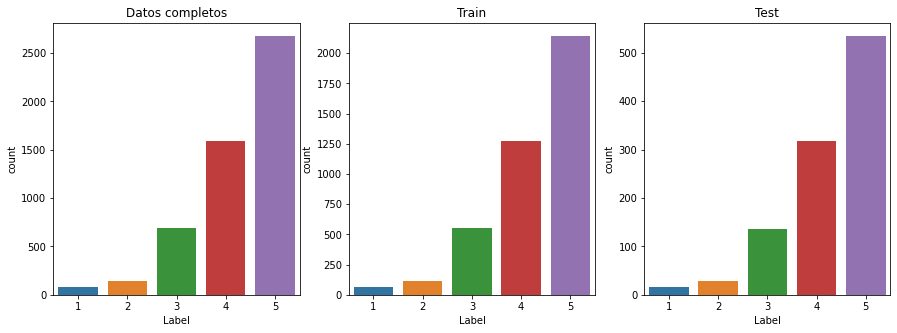

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.countplot(data = data_train, x = 'Label')
plt.title('Datos completos')

plt.subplot(132)
sns.countplot(data = df_train, x = 'Label')
plt.title('Train')

plt.subplot(133)
sns.countplot(data = df_test, x = 'Label')
plt.title('Test')

# Generación de embedings

In [ ]:
model = SentenceTransformer('bert-base-multilingual-uncased')

Exception when trying to download https://sbert.net/models/bert-base-multilingual-uncased.zip. Response 404


In [ ]:
df_train.columns

Index(['Place', 'Gender', 'Age', 'Country', 'Date', 'Label', 'Title',
       'Opinion'],
      dtype='object')

In [ ]:
%%time
X_train1 = np.array(list(df_train['Opinion'].apply(model.encode).values))
X_test1 = np.array(list(df_test['Opinion'].apply(model.encode).values))

CPU times: user 23min 13s, sys: 4min 43s, total: 27min 56s
Wall time: 27min 51s


In [ ]:
# #Exportar las matrices para no recalcular los embeddings
# pickle.dump(X_train1,open(path+"X_train1",'wb'))
# pickle.dump(X_test1,open(path+"X_test1",'wb'))

In [ ]:
# #Importar
# X_train1=pickle.load(open(path+"X_train1",'rb'))
# X_test1=pickle.load(open(path+"X_test1",'rb'))

In [ ]:
%%time
title_train = np.array(list(df_train['Title'].apply(model.encode).values))
title_test = np.array(list(df_test['Title'].apply(model.encode).values))

CPU times: user 7min 29s, sys: 1.78 s, total: 7min 31s
Wall time: 7min 30s


In [ ]:
# pickle.dump(title_train,open(path+"title_train",'wb'))
# pickle.dump(title_test,open(path+"title_test",'wb'))

In [ ]:
# title_train=pickle.load(open(path+"title_train",'rb'))
# title_test=pickle.load(open(path+"title_test",'rb'))

In [ ]:
%%time
X_train2 = np.hstack((X_train1,title_train))
X_test2 = np.hstack((X_test1,title_test))

CPU times: user 16.2 ms, sys: 30 µs, total: 16.2 ms
Wall time: 16 ms


In [ ]:
%%time
X_train3 = np.hstack((X_train2,df_train['Age'].values.reshape((len(df_train),1))))
X_test3 = np.hstack((X_test2,df_test['Age'].values.reshape((len(df_test),1))))

CPU times: user 124 ms, sys: 369 ms, total: 493 ms
Wall time: 498 ms


In [ ]:
%%time
country_train = np.array(list(df_train['Country'].apply(model.encode).values))
country_test = np.array(list(df_test['Country'].apply(model.encode).values))

CPU times: user 6min 26s, sys: 1.61 s, total: 6min 28s
Wall time: 6min 27s


In [ ]:
# pickle.dump(country_train,open(path+"country_train",'wb'))
# pickle.dump(country_test,open(path+"country_test",'wb'))

In [ ]:

# country_train=pickle.load(open(path+"country_train",'rb'))
# country_test=pickle.load(open(path+"country_test",'rb'))

In [ ]:
X_train4 = np.hstack((X_train3,country_train))
X_test4 = np.hstack((X_test3,country_test))

In [ ]:
X_train5 = np.hstack((X_train4,df_train['Gender'].apply(lambda x: 1 if x == 'Male' else 0).values.reshape((len(df_train),1))))
X_test5 = np.hstack((X_test4,df_test['Gender'].apply(lambda x: 1 if x == 'Male' else 0).values.reshape((len(df_test),1))))

In [ ]:
# opinion y genero
X_train6 = np.hstack((X_train1,df_train['Gender'].apply(lambda x: 1 if x == 'Male' else 0).values.reshape((len(df_train),1))))
X_test6 = np.hstack((X_test1,df_test['Gender'].apply(lambda x: 1 if x == 'Male' else 0).values.reshape((len(df_test),1))))

In [ ]:
#opinon - edad
X_train7 = np.hstack((X_train1,df_train['Age'].values.reshape((len(df_train),1))))
X_test7 = np.hstack((X_test1,df_test['Age'].values.reshape((len(df_test),1))))

In [ ]:
#opinion - pais
X_train8 = np.hstack((X_train1,country_train))
X_test8 = np.hstack((X_test1,country_test))

In [ ]:
y_train = df_train['Label'].values.astype(int)
y_test = df_train['Label'].values.astype(int)

In [ ]:
from sklearn import svm
def clasificador(X_train, X_test, model):
  # X: matriz de caracteristicas
  # model: nombre del modelo
  y_train = df_train['Label'].values
  y_train=y_train.astype('int')
  y_test = df_test['Label'].values
  y_test=y_test.astype('int')
  #cls = XGBClassifier(n_jobs = -1)
  cls = SVC(decision_function_shape='ovo', random_state=0)
  cls.fit(X_train, y_train)
  y_hat = cls.predict(X_test)
  print(model)
  print("MSE:",mean_squared_error(y_test, y_hat))
  print("RMSE:",mean_squared_error(y_test, y_hat, squared=False))
  print("F1-score:",f1_score(y_test, y_hat, average="macro"))
  print(classification_report(y_test, y_hat, digits = 3))
  #return y_test, y_hat
  #sns.heatmap(confusion_matrix(y_test, y_hat))

# Resultados

In [ ]:
%%time
clasificador(X_train1, X_test1, 'SentenceBert utilizando solo la opinion') 

SentenceBert utilizando solo la opinion
MSE: 1.0154589371980676
RMSE: 1.0076998249469271
F1-score: 0.2294117127276399
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        29
           3      0.486     0.380     0.426       137
           4      0.500     0.003     0.006       318
           5      0.564     0.976     0.715       535

    accuracy                          0.556      1035
   macro avg      0.310     0.272     0.229      1035
weighted avg      0.509     0.556     0.428      1035

CPU times: user 28.7 s, sys: 43.5 ms, total: 28.7 s
Wall time: 28.6 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%time
clasificador(X_train2, X_test2, 'SentenceBert utilizando la opinion y el titulo')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
SentenceBert utilizando la opinion y el titulo
MSE: 0.8966183574879227
RMSE: 0.946899338624715
F1-score: 0.255366625824727
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        29
           3      0.523     0.423     0.468       137
           4      0.349     0.047     0.083       318
           5      0.583     0.961     0.726       535

    accuracy                          0.567      1035
   macro avg      0.291     0.286     0.255      1035
weighted avg      0.478     0.567     0.463      1035



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%time
clasificador(X_train3, X_test3, 'SentenceBert utilizando la opinion, el titulo y la edad')

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.68 µs
SentenceBert utilizando la opinion, el titulo y la edad
MSE: 1.336231884057971
RMSE: 1.1559549662759232
F1-score: 0.13630573248407643
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        29
           3      0.000     0.000     0.000       137
           4      0.000     0.000     0.000       318
           5      0.517     1.000     0.682       535

    accuracy                          0.517      1035
   macro avg      0.103     0.200     0.136      1035
weighted avg      0.267     0.517     0.352      1035



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%time
clasificador(X_train4, X_test4, 'SentenceBert utilizando la opinion, el titulo, la edad y el país')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.78 µs
SentenceBert utilizando la opinion, el titulo, la edad y el país
MSE: 1.336231884057971
RMSE: 1.1559549662759232
F1-score: 0.13630573248407643
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        29
           3      0.000     0.000     0.000       137
           4      0.000     0.000     0.000       318
           5      0.517     1.000     0.682       535

    accuracy                          0.517      1035
   macro avg      0.103     0.200     0.136      1035
weighted avg      0.267     0.517     0.352      1035



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%time
clasificador(X_train5, X_test5, 'SentenceBert utilizando la opinion, el titulo, la edad, el país y genero')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
SentenceBert utilizando la opinion, el titulo, la edad, el país y genero
MSE: 1.336231884057971
RMSE: 1.1559549662759232
F1-score: 0.13630573248407643
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        29
           3      0.000     0.000     0.000       137
           4      0.000     0.000     0.000       318
           5      0.517     1.000     0.682       535

    accuracy                          0.517      1035
   macro avg      0.103     0.200     0.136      1035
weighted avg      0.267     0.517     0.352      1035



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%time
clasificador(X_train6, X_test6, 'SentenceBert utilizando la opinion y genero')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
SentenceBert utilizando la opinion y genero
MSE: 1.0019323671497584
RMSE: 1.0009657172699564
F1-score: 0.23020406367088292
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        29
           3      0.482     0.387     0.429       137
           4      0.250     0.003     0.006       318
           5      0.566     0.974     0.716       535

    accuracy                          0.556      1035
   macro avg      0.260     0.273     0.230      1035
weighted avg      0.433     0.556     0.429      1035



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%time
clasificador(X_train7, X_test7, 'SentenceBert utilizando la opinion y edad')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
SentenceBert utilizando la opinion y edad
MSE: 1.336231884057971
RMSE: 1.1559549662759232
F1-score: 0.13630573248407643
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        29
           3      0.000     0.000     0.000       137
           4      0.000     0.000     0.000       318
           5      0.517     1.000     0.682       535

    accuracy                          0.517      1035
   macro avg      0.103     0.200     0.136      1035
weighted avg      0.267     0.517     0.352      1035



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%time
clasificador(X_train8, X_test8, 'SentenceBert utilizando la opinion y pais')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
SentenceBert utilizando la opinion y pais
MSE: 1.2753623188405796
RMSE: 1.1293194051465598
F1-score: 0.16866923162012853
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        29
           3      1.000     0.044     0.084       137
           4      0.419     0.041     0.074       318
           5      0.526     0.981     0.685       535

    accuracy                          0.526      1035
   macro avg      0.389     0.213     0.169      1035
weighted avg      0.533     0.526     0.388      1035



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
